**Basic Image Processing Operations.**

---

Edge Detection:

> Edges are the very basic low level information in which we would do in Image processing. edges are the area where the intensity values in image changes massively so to make sure that particular area is an edge we basiclly find out the gradients or finding the rate of change of intesity values and we will use some threshold to declare that area is an edge. those are kind of building block for feature extraction in the Image for further processing. Here we are describing different kind of kernels for finding out the edges.   



In [0]:
# import the necessary packages
import numpy as np
from urllib.request import urlopen
import cv2
from matplotlib import pyplot as plt

# METHOD #1: OpenCV, NumPy, and urllib
def url_to_image(url):
	# download the image, convert it to a NumPy array, and then read
	# it into OpenCV format
	resp = urlopen(url)
	image = np.asarray(bytearray(resp.read()), dtype="uint8")
	image = cv2.imdecode(image, cv2.IMREAD_COLOR)
 
	# return the image
	return image

In [0]:
image = url_to_image("https://fontsarena-cd5e.kxcdn.com/wp-content/uploads/2019/04/helvetica-now-font-400x364.png")

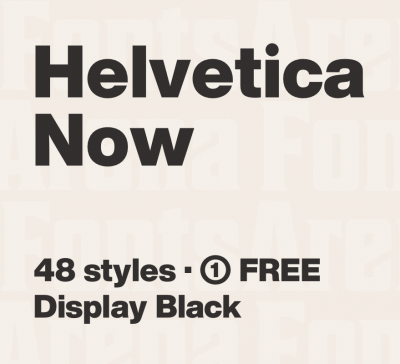

In [3]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)

**Canny Edge Detector**

---

Canny edge detector is a one kind of edge detector that uses different steps to identify an edge. basically its a three step process. Initially it findout the first order derivative of the pixel values by convolving it with a gaussian kernel in x and y direction. and then it uses something called hysterisis thresholding that means having two threshold values to declare that particular pixel value is an edge pixel or not. and finally it uses non maximum seperation to remove the un wanted pixels that are not contributing to egde pixels.

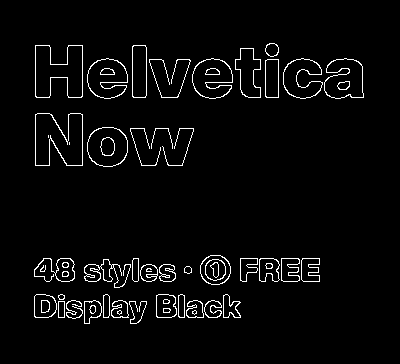

In [4]:
#Canny edge detector 
edges = cv2.Canny(image,100,200)
cv2_imshow(edges)

**Vertical Edge Detector**

---

Vertical edge detector is a kernel. by convolving an image using this kernel will filter the similar verticlal pixel values in the local region of the image here [3X3]. the kernel values for the vertical edge detectr are. 
[-1, 0 ,1]
[-1, 0, 1]
[-1, 0, 1]

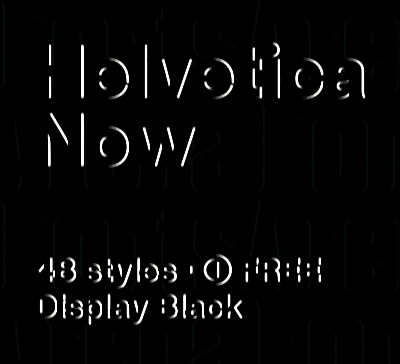

In [5]:
kernel = np.float32([[-1,0,1],[-1,0,1],[-1,0,1]])
dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

**Horizontal Edge Detector**

---


Horizontal edge detector is a kernel. by convolving an image using this kernel will filter the similar horizontal pixel values in the local region of the image here [3X3]. the kernel values for the vertical edge detectr are. [-1, -1 ,1] [0, 0, 0] [1, 1, 1]

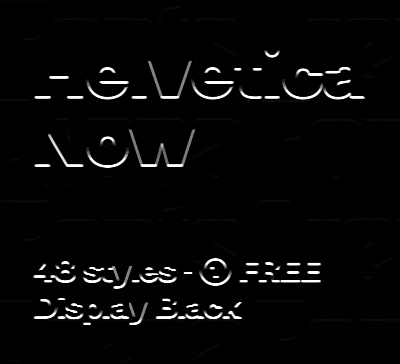

In [6]:
hor_kernel = np.float32([[-1,-1,-1],[0,0,0],[1,1,1]])
hor_dst = cv2.filter2D(image, -1,hor_kernel)
cv2_imshow(hor_dst)

**45 degree Angled Edge Detector  **

---

By convloving an image using this kernel will provide the edges in the local region of the image which are inclined to 45 Degree. and the kernel values are [-2, -1, 0] [-1, 0, 1] [0, 1, 2]

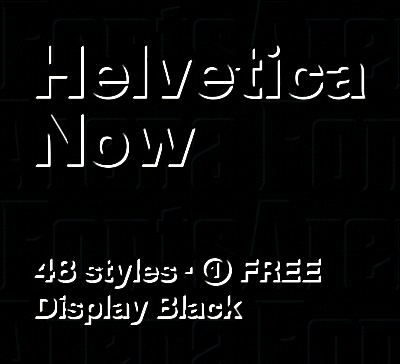

In [7]:
ang_ker = np.float32([[-2,-1,0],[-1,0,1],[0,1,2]])
ang_dst = cv2.filter2D(image, -1, ang_ker)
cv2_imshow(ang_dst)

**Blur Kernel**

---

Blur kernel is a kind of smoothing out an image buy covolving using the mean value of its neighbours. kernel values are. 



[0.003663, 0.003663, 0.003663]




[0.003663, 0.003663, 0.003663],



[0.003663, 0.003663, 0.003663]

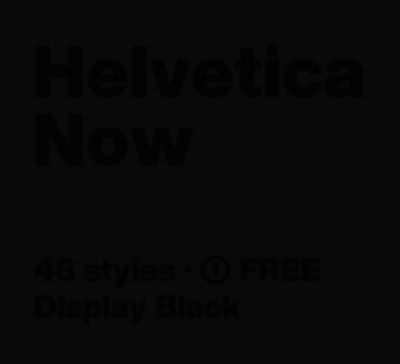

In [8]:
blur_ker = np.ones((3,3), dtype='f') * (1/256)
blur_img = cv2.filter2D(image, -1,blur_ker)
cv2_imshow(blur_img)

**Sharp Kernel**

---

Sharpening the image uisng sharp kernel is like convolving it with negative of mean values in the local region of an image.

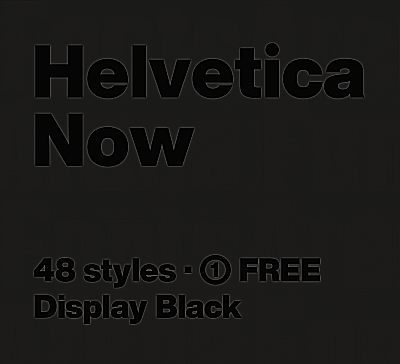

In [9]:
sharp_ker = np.float32([[-1/9,-1/9,-1/9],[-1/9,1,-1/9],[-1/9,-1/9,-1/9]])
shar = cv2.filter2D(image, -1, sharp_ker)
cv2_imshow(shar)

**Identity Kernel**

---

I dentity kernel is kind of kernel which doesn't affect the original image. after convolving you will get the same image as the original. kernel values are.

[0, 0, 0]

[0, 1, 0]

[0, 0, 0]

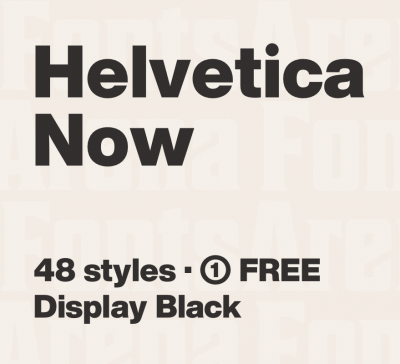

In [13]:
kernid = np.float32([[0,0,0],[0,1,0],[0,0,0]])
identity_kern = cv2.filter2D(image, -1,kernid)
cv2_imshow(identity_kern)